In [8]:
import pennylane as qml
from pennylane import numpy as np
from functools import partial
from qiskit.quantum_info import hellinger_fidelity



shots = 6000
dev = qml.device("default.qubit", wires=2, shots=shots)


def samples_to_counts(samples):
    # Convert samples to a probability distribution
    distr = {}
    for sample in samples:
        sample = tuple(sample)
        if sample not in distr:
            distr[sample] = 0
        distr[sample] += 1
    return distr


@partial(qml.cut_circuit_mc)
@qml.qnode(dev)
def circuit(x):
    qml.RX(0.89, wires=0)
    qml.RY(0.5, wires=1)
    qml.RX(1.3, wires=2)

    qml.CNOT(wires=[0, 1])
    qml.WireCut(wires=1)
    qml.CNOT(wires=[1, 2])

    qml.RX(x, wires=0)
    qml.RY(0.7, wires=1)
    qml.RX(2.3, wires=2)
    return qml.sample(wires=[0, 1, 2])


x = 0.3
times = 5
# samples = circuit(x)

# c1 = samples_to_counts(samples)


dev2 = qml.device("default.qubit", wires=3, shots=shots * 100)

@qml.qnode(dev2)
def circuit_base(x):
    qml.RX(0.89, wires=0)
    qml.RY(0.5, wires=1)
    qml.RX(1.3, wires=2)

    qml.CNOT(wires=[0, 1])
    qml.WireCut(wires=1)
    qml.CNOT(wires=[1, 2])

    qml.RX(x, wires=0)
    qml.RY(0.7, wires=1)
    qml.RX(2.3, wires=2)
    return qml.sample(wires=[0, 1, 2])

c2 = samples_to_counts(circuit_base(x))


In [15]:
@partial(qml.cut_circuit_mc, classical_processing_fn=lambda x: x)
@qml.qnode(dev)
def circuit(x):
    qml.RX(0.89, wires=0)
    qml.RY(0.5, wires=1)
    qml.RX(1.3, wires=2)

    qml.CNOT(wires=[0, 1])
    qml.WireCut(wires=1)
    qml.CNOT(wires=[1, 2])

    qml.RX(x, wires=0)
    qml.RY(0.7, wires=1)
    qml.RX(2.3, wires=2)
    return qml.sample(wires=[0, 1, 2])

c3 = circuit(x)


In [16]:
def nearest_probability_distribution(self) -> dict[int, float]:
    sorted_probs = dict(sorted(self.items(), key=lambda item: item[1]))
    num_elems = len(sorted_probs)
    new_probs = {}
    beta = 0.0
    diff = 0.0
    for key, val in sorted_probs.items():
        temp = val + beta / num_elems
        if temp < 0:
            beta += val
            num_elems -= 1
            diff += val * val
        else:
            diff += (beta / num_elems) * (beta / num_elems)
            new_probs[key] = sorted_probs[key] + beta / num_elems
    return new_probs

def counts_to_probs(c):
    return nearest_probability_distribution({k: v / shots for k, v in c.items()})

In [17]:
print(hellinger_fidelity(counts_to_probs(c2), counts_to_probs({k: v/4 for k, v in c3.items()})))

0.8663092963725327


In [12]:
c2

{(0, 0, 1): 362182,
 (1, 1, 0): 99852,
 (0, 0, 0): 21148,
 (0, 1, 0): 15239,
 (1, 1, 1): 9326,
 (0, 1, 1): 49012,
 (1, 0, 1): 28558,
 (1, 0, 0): 14683}

In [13]:
{k: v/4 for k, v in c3.items()}

{(0, 0, 0): tensor(9.875, requires_grad=True),
 (1, 1, 0): tensor(13.75, requires_grad=True),
 (0, 0, 1): tensor(98.375, requires_grad=True),
 (1, 0, 1): tensor(31., requires_grad=True),
 (0, 1, 1): tensor(17.5, requires_grad=True),
 (0, 1, 0): tensor(31.5, requires_grad=True),
 (1, 0, 0): tensor(3.625, requires_grad=True),
 (1, 1, 1): tensor(3.375, requires_grad=True)}

In [14]:

c1

NameError: name 'c1' is not defined

In [ ]:
# print(samples)
for sample in samples:
    print(sample)

[0. 0. 1.]
[0. 0. 0.]
[0. 1. 0.]
[1. 0. 1.]
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 1.]
[1. 0. 1.]
[0. 1. 1.]
[1. 1. 1.]
[0. 0. 1.]
[1. 0. 1.]
[1. 1. 0.]
[0. 0. 1.]
[0. 1. 0.]
[0. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 0.]
[0. 0. 1.]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]
[1. 1. 1.]
[1. 0. 1.]
[1. 1. 1.]
[1. 1. 0.]
[0. 0. 0.]
[1. 1. 0.]
[1. 0. 0.]
[1. 1. 0.]
[0. 1. 1.]
[0. 1. 0.]
[0. 1. 1.]
[1. 1. 0.]
[0. 0. 1.]
[1. 0. 0.]
[1. 0. 1.]
[0. 0. 0.]
[1. 1. 0.]
[0. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 1. 1.]
[1. 0. 1.]
[0. 1. 0.]
[0. 0. 1.]
[1. 1. 0.]
[0. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 1. 0.]
[1. 0. 0.]
[1. 0. 0.]
[0. 0. 1.]
[0. 0. 0.]
[0. 0. 1.]
[0. 0. 1.]
[0. 1. 1.]
[0. 0. 1.]
[0. 1. 0.]
[0. 0. 1.]
[0. 0. 0.]
[0. 0. 0.]
[0. 1. 0.]
[0. 0. 0.]
[1. 1. 0.]
[0. 0. 1.]
[0. 0. 0.]
[1. 1. 0.]
[0. 1. 0.]
[0. 0. 1.]
[1. 1. 0.]
[0. 1. 0.]
[1. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 0. 0.]
[0. 1. 0.]
[0. 1. 0.]
[0. 0. 1.]
[1. 1. 0.]
[1. 0. 1.]
[0. 0. 1.]
[0. 1. 0.]
[0. 0. 0.]
[1. 1. 0.]

In [ ]:
@partial(qml.cut_circuit_mc)
@qml.qnode(dev)
def circuit2(x):
    qml.RX(0.89, wires=0)
    qml.RY(0.5, wires=1)
    qml.RX(1.3, wires=2)

    qml.CNOT(wires=[0, 1])
    qml.WireCut(wires=1)
    qml.CNOT(wires=[1, 2])

    qml.RX(x, wires=0)
    qml.RY(0.7, wires=1)
    qml.RX(2.3, wires=2)
    return qml.sample(wires=[0, 1, 2])

In [ ]:
samples = [circuit2(x),
np.mean([fn(s) for s in samples])

SyntaxError: incomplete input (3726202415.py, line 2)

In [ ]:
mean


-0.17

In [ ]:
ops = [
    qml.Hadamard(wires=0),
    qml.CNOT(wires=[0, 1]),
    qml.WireCut(wires=1),
    qml.CNOT(wires=[1, 2]),
]
measurements = [qml.sample(wires=[0, 1, 2])]
tape = qml.tape.QuantumTape(ops, measurements)

In [ ]:
g = qml.qcut.tape_to_graph(tape)
qml.qcut.replace_wire_cut_nodes(g)
subgraphs, communication_graph = qml.qcut.fragment_graph(g)
tapes = [qml.qcut.graph_to_tape(sg) for sg in subgraphs]

In [ ]:
configs, settings = qml.qcut.expand_fragment_tapes_mc(tapes, communication_graph, 30)
print(settings)
for i, (c1, c2) in enumerate(zip(configs[0], configs[1])):
    print(f"config {i}:")
    print(c1.draw())
    print("")
    print(c2.draw())
    print("")



[[4 6 0 2 2 5 4 7 1 2 6 3 3 0 7 1 2 4 7 3 0 2 7 7 1 3 0 4 5 7]]
config 0:
0: ──H─╭●─┤  Sample[|1⟩⟨1|]
1: ────╰X─┤  Sample[Y]     

1: ──H──S─╭●─┤  Sample[|1⟩⟨1|]
2: ───────╰X─┤  Sample[|1⟩⟨1|]

config 1:
0: ──H─╭●─┤  Sample[|1⟩⟨1|]
1: ────╰X─┤  Sample[Z]     

1: ──I─╭●─┤  Sample[|1⟩⟨1|]
2: ────╰X─┤  Sample[|1⟩⟨1|]

config 2:
0: ──H─╭●─┤  Sample[|1⟩⟨1|]
1: ────╰X─┤  Sample[I]     

1: ──I─╭●─┤  Sample[|1⟩⟨1|]
2: ────╰X─┤  Sample[|1⟩⟨1|]

config 3:
0: ──H─╭●─┤  Sample[|1⟩⟨1|]
1: ────╰X─┤  Sample[X]     

1: ──H─╭●─┤  Sample[|1⟩⟨1|]
2: ────╰X─┤  Sample[|1⟩⟨1|]

config 4:
0: ──H─╭●─┤  Sample[|1⟩⟨1|]
1: ────╰X─┤  Sample[X]     

1: ──H─╭●─┤  Sample[|1⟩⟨1|]
2: ────╰X─┤  Sample[|1⟩⟨1|]

config 5:
0: ──H─╭●─┤  Sample[|1⟩⟨1|]
1: ────╰X─┤  Sample[Y]     

1: ──X──H──S─╭●─┤  Sample[|1⟩⟨1|]
2: ──────────╰X─┤  Sample[|1⟩⟨1|]

config 6:
0: ──H─╭●─┤  Sample[|1⟩⟨1|]
1: ────╰X─┤  Sample[Y]     

1: ──H──S─╭●─┤  Sample[|1⟩⟨1|]
2: ───────╰X─┤  Sample[|1⟩⟨1|]

config 7:
0: ──H─╭●─┤  Sample[|1⟩⟨1|]
1: ───

In [ ]:
dev = qml.device("default.qubit", shots=10)

@qml.qnode(dev, diff_method="parameter-shift")
def circuit(angle):
    qml.RX(angle, wires=0)
    return qml.sample(qml.PauliX(0))

angle = qml.numpy.array(0.1)
res = qml.jacobian(circuit)(angle)

In [ ]:
res

array([ 0., -1.,  1.,  1.,  0.,  0.,  0.,  0., -1.,  1.])

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data
shots = np.array([10, 100, 1000, 10000]).reshape(-1, 1)
times = np.array([4.507555251941085, 5.898660019040108, 7.890919256955385, 45.53793793730438])

# Perform linear regression
model = LinearRegression().fit(shots, times)
t_0 = model.intercept_
k = model.coef_[0]

t_0, k

(4.6114096937699305, 0.004085457577872298)

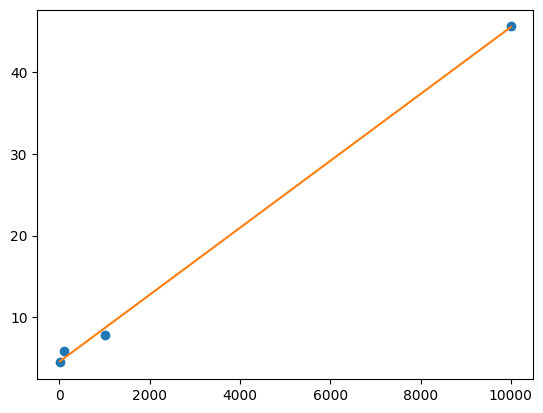

In [ ]:
plt.plot(shots, times, "o")
plt.plot(shots, model.predict(shots))
plt.show()

In [5]:
import pennylane as qml

[ds] = qml.data.load("other", name="hamlib-maxcut")
ham = ds.hamiltonians[4]

print(ham)


dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def circuit(basis_state):
    qml.BasisStatePreparation(basis_state, wires=range(4))
    return qml.expval(ham)

drawer = qml.draw(circuit)
print(drawer([0, 1, 0, 1]))

# # edges cut when all nodes are in the same set
# circuit([0,0,0,0]) # output: array(0.)
# # edges cut when some nodes are in separate sets
# circuit([0,0,1,1]) # output: array(4.)

3.0 * I(0) + -0.5 * (Z(0) @ Z(1)) + -0.5 * (Z(0) @ Z(2)) + -0.5 * (Z(0) @ Z(3)) + -0.5 * (Z(1) @ Z(2)) + -0.5 * (Z(1) @ Z(3)) + -0.5 * (Z(2) @ Z(3))
0: ─╭BasisStatePreparation(M0)─┤ ╭<𝓗>
1: ─├BasisStatePreparation(M0)─┤ ├<𝓗>
2: ─├BasisStatePreparation(M0)─┤ ├<𝓗>
3: ─╰BasisStatePreparation(M0)─┤ ╰<𝓗>

M0 = 
[0 1 0 1]


In [6]:
[ds] = qml.data.load("other", name="linearly-separable")

ds.train['4']['inputs'] # points in 4-dimensional space
ds.train['4']['labels'] # labels for the points above

[1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -

In [7]:
temp_ds = qml.data.load('other', name='mqt-bench')

dev = qml.device('default.qubit')

@qml.qnode(dev)
def circuit(ops):
    for op in ops:
        qml.apply(op)
    return qml.state()

def first_10_ae_benchmark():
    for i in range(2,12):
        circuit(temp_ds.ae[str(i)])


first_10_ae_benchmark()
# timeit.timeit(first_10_ae_benchmark,number=5) # time the simulation: around 2 seconds

In [1]:
import pennylane as qml

dev = qml.device('default.mixed', wires=3, shots=1331)


@qml.qnode(dev)
def circuit():
    qml.RX(0.1, wires=0)
    qml.RY(0.2, wires=0)
    m0 = qml.measure(0)
    qml.RX(0.1, wires=0)
    qml.RY(0.2, wires=0)
    qml.CNOT(wires=[0, 1])
    return (qml.expval(m0))

In [6]:
circuit()

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
drawer = qml.draw(circuit)
print(drawer())

0: ──RX(0.10)──RY(0.20)──┤↗├──RX(0.10)──RY(0.20)─╭●─┤             
1: ───────────────────────║──────────────────────╰X─┤             
                          ╚═════════════════════════╡  Sample[MCM]


In [4]:
from qiskit.circuit import QuantumCircuit, ClassicalRegister
from qiskit.quantum_info import hellinger_fidelity
from qiskit_aer import AerSimulator
from qiskit.circuit.random import random_circuit
from qtpu.helpers import defer_mid_measurements

sim = AerSimulator()


circuit = random_circuit(5, 5, measure=True)

# circuit = QuantumCircuit(5, 1)
# circuit.h(0)
# circuit.cx(range(4), range(1, 5))
# circuit.measure(3, 0)
# circuit.cx(range(4), range(1, 5))
# circuit.measure_all()

circuit.draw()

┌────┐     ┌───────┐┌────┐         ┌────────┐      ┌─┐         
q_0: ┤ √X ├─────┤0      ├┤ √X ├───────X─┤3       ├──────┤M├─────────
     └────┘     │       │├────┤       │ │        │      └╥┘┌─┐      
q_1: ──X─────■──┤       ├┤ √X ├───────X─┤1       ├───────╫─┤M├──────
       │     │  │  Rccx │└────┘┌───┐  │ │        │┌────┐ ║ └╥┘┌─┐   
q_2: ──X─────┼──┤2      ├──X───┤ X ├──┼─┤  Rcccx ├┤ √X ├─╫──╫─┤M├───
       │     │  │       │  │   ├───┴┐ │ │        │└┬─┬─┘ ║  ║ └╥┘   
q_3: ──■─────┼──┤1      ├──■───┤ √X ├─┼─┤2       ├─┤M├───╫──╫──╫────
     ┌───┐ ┌─┴─┐└───────┘  │   └────┘ │ │        │ └╥┘   ║  ║  ║ ┌─┐
q_4: ┤ X ├─┤ X ├───────────X──────────■─┤0       ├──╫────╫──╫──╫─┤M├
     └───┘ └───┘                        └────────┘  ║    ║  ║  ║ └╥┘
c: 5/═══════════════════════════════════════════════╩════╩══╩══╩══╩═
                                                    3    0  1  2  4

In [5]:
defer_mid_measurements(circuit).draw()

┌────┐     ┌───────┐┌────┐         ┌────────┐      ┌─┐         
q_0: ┤ √X ├─────┤0      ├┤ √X ├───────X─┤3       ├──────┤M├─────────
     └────┘     │       │├────┤       │ │        │      └╥┘┌─┐      
q_1: ──X─────■──┤       ├┤ √X ├───────X─┤1       ├───────╫─┤M├──────
       │     │  │  Rccx │└────┘┌───┐  │ │        │┌────┐ ║ └╥┘┌─┐   
q_2: ──X─────┼──┤2      ├──X───┤ X ├──┼─┤  Rcccx ├┤ √X ├─╫──╫─┤M├───
       │     │  │       │  │   ├───┴┐ │ │        │└┬─┬─┘ ║  ║ └╥┘   
q_3: ──■─────┼──┤1      ├──■───┤ √X ├─┼─┤2       ├─┤M├───╫──╫──╫────
     ┌───┐ ┌─┴─┐└───────┘  │   └────┘ │ │        │ └╥┘   ║  ║  ║ ┌─┐
q_4: ┤ X ├─┤ X ├───────────X──────────■─┤0       ├──╫────╫──╫──╫─┤M├
     └───┘ └───┘                        └────────┘  ║    ║  ║  ║ └╥┘
c: 5/═══════════════════════════════════════════════╩════╩══╩══╩══╩═
                                                    3    0  1  2  4

In [2]:
from qiskit import transpile


circuit = transpile(circuit, sim)
circuit2 = transpile(circuit2, sim)

result = sim.run(circuit, shots=10000).result().get_counts()
result2 = sim.run(circuit2, shots=10000).result().get_counts()

print(result)
print(result2)

hellinger_fidelity(result, result2)

{'00000 0': 5061, '10101 1': 4939}
{'10101 1': 4902, '00000 0': 5098}


0.9999863065381085

ValueError: figure size must be positive finite not [-22.52609138 -12.87611094]

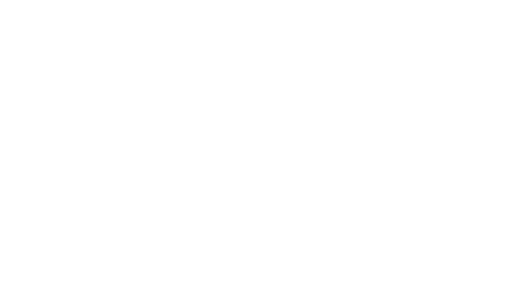

In [110]:
circuit.draw('mpl', -1)

In [ ]:
circuit2.draw('mpl', -1)